In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST 
elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [88]:
df = pd.read_csv("heart.csv")

In [89]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [90]:
#check for NUll value in dataset
df.isnull().values.any()

False

Text(0, 0.5, 'no of records')

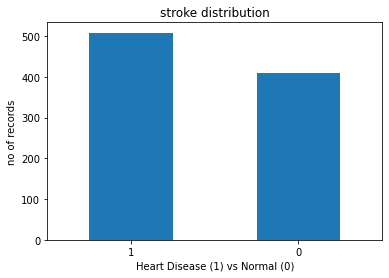

In [91]:
LABELS = ["1", "0"]
count_classes = pd.value_counts(df['HeartDisease'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("stroke distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Heart Disease (1) vs Normal (0)")
plt.ylabel("no of records")

In [92]:
def convert_category_to_numeric(df,column):
    category_list = df[column].unique()
    category_list_size = len(category_list)
    key_value_pair = {}
    for i in range(category_list_size):
        key_value_pair[category_list[i]] = i
    df[column] = df[column].map(key_value_pair)
    return df

In [93]:
df = convert_category_to_numeric(df,'ChestPainType')
df = convert_category_to_numeric(df,'Sex')
df = convert_category_to_numeric(df,'RestingECG')
df = convert_category_to_numeric(df,'ExerciseAngina')
df = convert_category_to_numeric(df,'ST_Slope')

In [94]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [95]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.452070,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [97]:
# Corelation

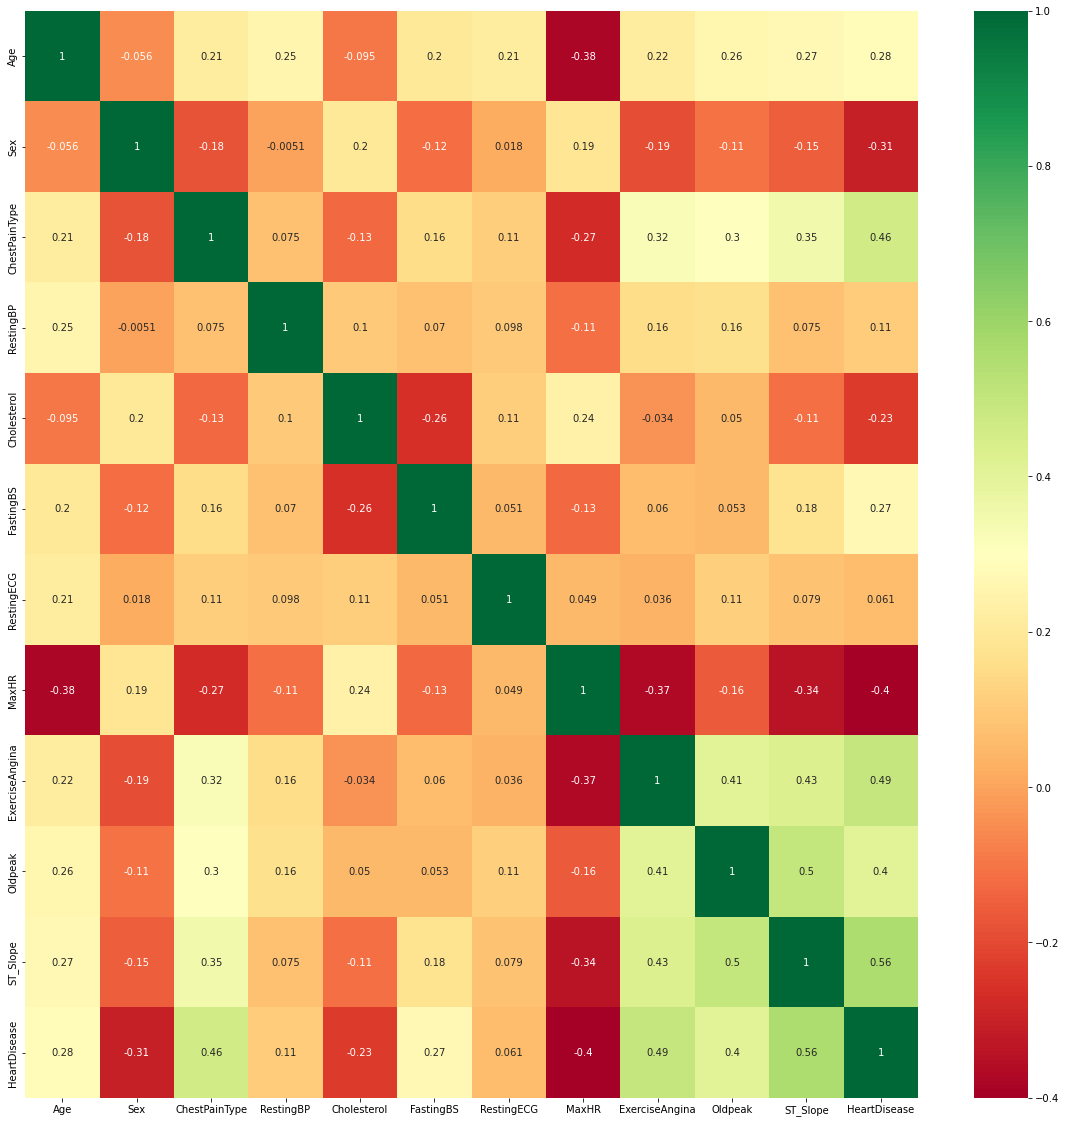

In [98]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [99]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

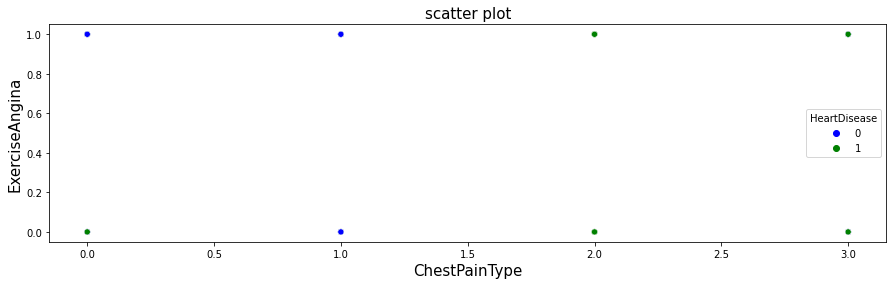

In [100]:
plt.rcParams["figure.figsize"] = [15,4]
sns.scatterplot(data=df, x="ChestPainType", y="ExerciseAngina",hue='HeartDisease' , palette= ["blue","green"])
plt.title('scatter plot', fontsize = 15)
plt.xlabel('ChestPainType', fontsize = 15)
plt.ylabel('ExerciseAngina', fontsize = 15)

# display the plot
plt.show()

In [101]:
df1 = df[((df.ChestPainType == 0) & (df.ExerciseAngina == 1))]

In [102]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
11,58,0,0,136,164,0,1,99,1,2.0,1,1
23,44,0,0,150,288,0,0,150,1,3.0,1,1
70,57,0,0,140,265,0,1,145,1,1.0,1,1
78,52,0,0,140,100,0,0,138,1,0.0,0,0
87,53,1,0,140,216,0,0,142,1,2.0,1,0


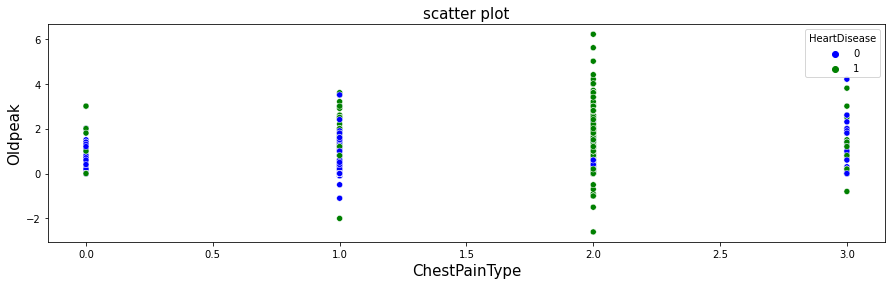

In [103]:
plt.rcParams["figure.figsize"] = [15,4]
sns.scatterplot(data=df, x="ChestPainType", y="Oldpeak",hue='HeartDisease' , palette= ["blue","green"])
plt.title('scatter plot', fontsize = 15)
plt.xlabel('ChestPainType', fontsize = 15)
plt.ylabel('Oldpeak', fontsize = 15)

# display the plot
plt.show()

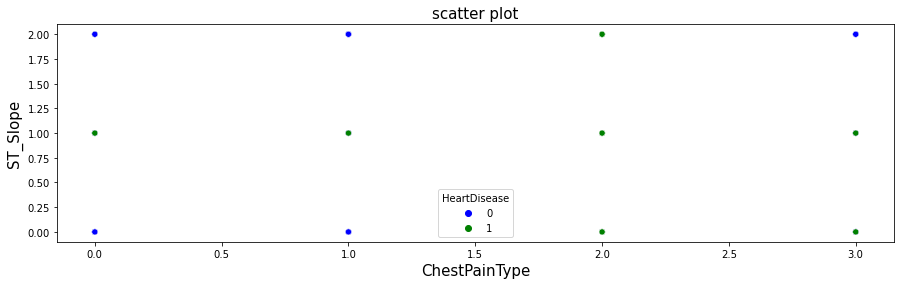

In [104]:
plt.rcParams["figure.figsize"] = [15,4]
sns.scatterplot(data=df, x="ChestPainType", y="ST_Slope",hue='HeartDisease' , palette= ["blue","green"])
plt.title('scatter plot', fontsize = 15)
plt.xlabel('ChestPainType', fontsize = 15)
plt.ylabel('ST_Slope', fontsize = 15)

# display the plot
plt.show()

In [105]:
df.to_csv("Processed_heart.csv",header=True,index=False)

In [106]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
